In [1]:
import pandas as pd
from datetime import *
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
import numpy as np

from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import Soils
soils = Soils.Soils()


%matplotlib inline

In [2]:
# Read the CSV file (utf-8 encoded)
dfsoil = pd.read_csv('DataWithClimat_v2_utf-8_merged_soils.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')
df = pd.read_csv('DataWithClimat_v2_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')



# Dictionnaire SICA - Code de profil

In [3]:
profil_dict = dict(zip(dfsoil.SICA_1, dfsoil.Unidad_Cod))
unidad_dict = dict(zip(dfsoil.SICA_1, dfsoil.Unidad_c_1))

In [4]:
# Main dataset SICA access: df['SICA 1']

df['Soil Profile'] = ""
df['Unidad_c_1'] = ""

for index, row in df.iterrows():
    print("SICA: {}  ".format(int(row['SICA 1'])))
    df.set_value(index,'Soil Profile', profil_dict[int(row['SICA 1'])])
    df.set_value(index, 'Unidad_c_1', unidad_dict[int(row['SICA 1'])])

SICA: 6607500996  
SICA: 6607500981  
SICA: 6607501034  
SICA: 6607500081  
SICA: 6607500108  
SICA: 6607500309  
SICA: 6607500014  
SICA: 6607500148  
SICA: 6607500516  
SICA: 6607501187  
SICA: 6607500304  
SICA: 6607500533  
SICA: 6607501128  
SICA: 6607500809  
SICA: 6638301425  
SICA: 6607500288  
SICA: 6607500769  
SICA: 6607500645  
SICA: 6607500010  
SICA: 6607500020  
SICA: 6638300269  
SICA: 6638300654  
SICA: 6638300700  
SICA: 6638300915  
SICA: 6638300093  
SICA: 6638301152  
SICA: 6638300126  
SICA: 6638300128  
SICA: 6638300130  
SICA: 6638300131  
SICA: 6638300158  
SICA: 6638300302  
SICA: 6638300328  
SICA: 6638301680  
SICA: 6638300310  
SICA: 6638300311  
SICA: 6638300602  
SICA: 6638300608  
SICA: 6600102437  
SICA: 6600103765  
SICA: 6600100265  
SICA: 6600101458  
SICA: 6600102066  
SICA: 6600103421  
SICA: 6600100722  
SICA: 6600100431  
SICA: 6600102095  
SICA: 6600101389  
SICA: 6600101064  
SICA: 6600102480  
SICA: 6600101163  
SICA: 6600101173  
SICA: 660010

# Récupérer les informations de sol

In [38]:
toDelete = []
all_soils_profiles = []

for index, row in df.iterrows():
    
    profileCode = row['Soil Profile']
    unidad = row['Unidad_c_1']
    
    if profileCode == " " or profileCode == "":
        toDelete.append(index)
        continue
    
    # Les données de ces profils sont incomplètes (totalement) 
    if profileCode == "66PUM" or profileCode == "66PUL" or profileCode == "66MCA" or profileCode == "66VEI":
        toDelete.append(index)
        continue
        
    # Les codes ne correspondent pas (plusieurs profils) on prend donc le seul profil existant pour 66PAR, 66OSP et 66CHU
    if profileCode == "66PAR":
        profileCode = "66PARP01"
    if profileCode == "66CHU":
        profileCode = "66CHUP01"
    if profileCode == "66OSP":
        profileCode = "66OSP01"
    
    # pour 66CAT, il existe 2 profils. On suppose ici que le champ 
    # unidad_c_1 (qui contient soit un 1 soit un 2) correspond au profil nécessaire
    
    # on a soit CAT1(A)cde ou soit CAT2(A)de
    
    if profileCode == "66CAT":
        if unidad[3] == "1":
            profileCode = "66CATP01"
            # Attention 66CATP01 n'a pas d'informations dans la 2ème couche
            
        elif unidad[3] == "2":
            profileCode = "66CATP02"
        else:
            print("Erreur avec code: {}".format(profileCode))
    
    
    # Get the different layers (key)
    layers = soils.getLayers(profileCode)
    
    # Récupérer les informations de chaque couches pour analyse. 
    soil = Soils.Soil(profileCode)
    
    # soil contient les informations de chaque couches (ph, organic, depth, etc)
    all_soils_profiles.append(soil) # pour étudier plus bas
    
    
    # Pour chaque couche on peut extraire l'information désirée
    nbLayer = soil.nbLayers
    if profileCode == "66CATP01":
        nbLayer -= 1
    print(":::::::::::::::::::::::::::::::::::::::::::")
    for l in range(0,nbLayer):
        print("Layer:      {}".format(l+1))
        print("Ph:         {}".format(soil.phs[l]))
        print("Organica:   {}".format(soil.organics[l]))
        print("Textura:    {}".format(soil.textures[l]))
        print("----------")
    
    

:::::::::::::::::::::::::::::::::::::::::::
Layer:      0
Ph:         5.55
Organica:   0.0285
Textura:    [ 1.  1.  1.  0.  0.]
----------
Layer:      1
Ph:         5.7
Organica:   0.015
Textura:    [ 1.  1.  1.  0.  0.]
----------
:::::::::::::::::::::::::::::::::::::::::::
Layer:      0
Ph:         5.55
Organica:   0.0285
Textura:    [ 1.  1.  1.  0.  0.]
----------
Layer:      1
Ph:         5.7
Organica:   0.015
Textura:    [ 1.  1.  1.  0.  0.]
----------
:::::::::::::::::::::::::::::::::::::::::::
Layer:      0
Ph:         5.15
Organica:   0.1085
Textura:    [ 1.  1.  1.  0.  1.]
----------
Layer:      1
Ph:         5.65
Organica:   0.0255
Textura:    [ 1.  1.  1.  0.  0.]
----------
Layer:      2
Ph:         5.25
Organica:   0.023
Textura:    [ 1.  1.  1.  0.  0.]
----------
:::::::::::::::::::::::::::::::::::::::::::
Layer:      0
Ph:         5.4
Organica:   0.038
Textura:    [ 1.  0.  1.  0.  0.]
----------
:::::::::::::::::::::::::::::::::::::::::::
Layer:      0
Ph:         5

# Analyse des données de sol

In [8]:

depthinfo = []

for elem in all_soils_profiles:
    depthinfo.append(elem.horizonDepthInfos)

Nombre de couches / rows
[1 2 3 4]
[397 225 312  41]


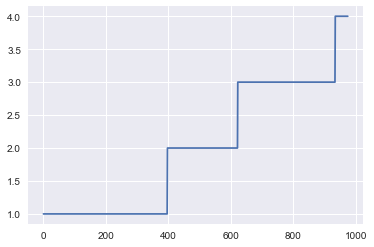

In [26]:
#print depthinfo
nbLayer = []
for e in depthinfo:
    nbLayer.append(len(e))

nbLayer = np.array(nbLayer)
nbLayer = np.sort(nbLayer)

plt.plot(nbLayer)

unique, counts = np.unique(nbLayer, return_counts=True)
print "Nombre de couches / rows"
print unique
print counts

In [30]:
for e in depthinfo:
    #print e -> [('0', '40', '40'), ('40', '70', '30'), ('70', '100', '30')]
    count = 0
    for tpl in e:
        count += 1
        if tpl[1] == '100':
            print("Couche 1 mètre: {}".format(count))
        

Couche 1 mètre: 2
Couche 1 mètre: 2
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 mètre: 3
Couche 1 mètre: 2
Couche 1 mètre: 2
Couche 1 mètre: 1
Couche 1 mètre: 3
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 1
Couche 1 mètre: 3
Couche 1 mètre: 3
Couche 1 mètre: 3
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 1
Couche 1 mètre: 3
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 3
Couche 1 mètre: 3
Couche 1 mètre: 3
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 mètre: 2
Couche 1 mètre: 1
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 mètre: 2
Couche 1 mètre: 1
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 1
Couche 1 mètre: 1
Couche 1 mètre: 3
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 mètre: 1
Couche 1 mètre: 2
Couche 1 m

Les 1 mètres se trouvent toujours entre les couches 1 et 3, jamais la couche 4 ! On peut ignorer la couche 4. 

# Ajout des données au df